 # This notebook discussed the connections between these formal objects:
 
 #### * ParseTree : Parse trees
 #### * DerivationSeq : Derivation sequences
 #### * IDSeq: Instantaneous Description (ID) Sequences
 
### We will demo it on the example in FIgure 11.1, with the derivation sequence shown on the right of this figure, and the ID sequence also shown below. This will help you in Asg-6.

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.SystemImports import *
from jove.DotBashers    import *
from jove.Def_md2mc     import *
from jove.Def_PDA       import * 
from jove.Def_md2mc     import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(explore_pda)
help(run_pda)
help(classify_l_id_path)
help(h_run_pda)
help(interpret_w_eps)
help(step_pda)
help(suvivor_id)
help(term_id)
help(final_id)
help(cvt_str_to_sym)
help(is_surv_id)
help(subsumed)
help(is_term_id)
help(is_final_id)



# Processing ```#a = 2 #b``` using 'currency-conversion' 
## Convert a's to two c's

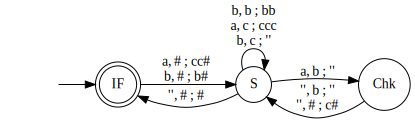

In [6]:
a_2b_pda = md2mc('''
PDA
 
!! Currency-convert : each a into two c's
!! handle corner-case of a's coming w/o b's
!! handle things like ababbb

''')
dotObj_pda(a_2b_pda, FuseEdges=True)

In [7]:
explore_pda('abaabbbbb', a_2b_pda)

String abaabbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', 'abaabbbbb', '#')
->  ('S', 'baabbbbb', 'cc#')
->  ('S', 'aabbbbb', 'c#')
->  ('S', 'abbbbb', 'ccc#')
->  ('S', 'bbbbb', 'ccccc#')
->  ('S', 'bbbb', 'cccc#')
->  ('S', 'bbb', 'ccc#')
->  ('S', 'bb', 'cc#')
->  ('S', 'b', 'c#')
->  ('S', '', '#')
->  ('IF', '', '#') .


In [9]:
explore_pda('abbbaaa', a_2b_pda)

String abbbaaa rejected by your PDA :-(
Visited states are:
{('S', 'baaa', '#'), ('S', 'aaa', 'b#'), ('S', 'bbbaaa', 'cc#'), ('S', 'a', 'ccc#'), ('S', 'bbaaa', 'c#'), ('Chk', 'aa', '#'), ('IF', 'baaa', '#'), ('S', 'aa', 'c#'), ('S', '', 'ccccc#'), ('IF', 'abbbaaa', '#')}


In [11]:
explore_pda('babbbaababbb', a_2b_pda)

String babbbaababbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', 'babbbaababbb', '#')
->  ('S', 'abbbaababbb', 'b#')
->  ('Chk', 'bbbaababbb', '#')
->  ('S', 'bbbaababbb', 'c#')
->  ('S', 'bbaababbb', '#')
->  ('IF', 'bbaababbb', '#')
->  ('S', 'baababbb', 'b#')
->  ('S', 'aababbb', 'bb#')
->  ('Chk', 'ababbb', 'b#')
->  ('S', 'ababbb', '#')
->  ('IF', 'ababbb', '#')
->  ('S', 'babbb', 'cc#')
->  ('S', 'abbb', 'c#')
->  ('S', 'bbb', 'ccc#')
->  ('S', 'bb', 'cc#')
->  ('S', 'b', 'c#')
->  ('S', '', '#')
->  ('IF', '', '#') .


## Dyck CFG and direct-converted PDA  

## Noting CFG inside PDA code as comments

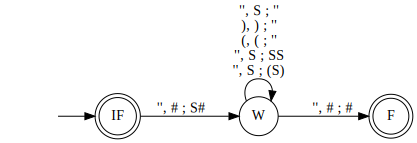

In [13]:
dyck = md2mc('''
PDA

!!-- S -> SS | (S) | ''
!!-- CFG follows

IF : '',#; S# -> W

W  : (,(; '' -> W
W  : ),); '' -> W

W  : '',S; SS  -> W
W  : '',S; (S) -> W
W  : '',S; ''  -> W

W  : '',#; # -> F
 

''')
dotObj_pda(dyck, FuseEdges=True)

In [15]:
explore_pda('((())())()', dyck)

String ((())())() accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', '((())())()', '#')
->  ('W', '((())())()', 'S#')
->  ('W', '((())())()', 'SS#')
->  ('W', '((())())()', '(S)S#')
->  ('W', '(())())()', 'S)S#')
->  ('W', '(())())()', 'SS)S#')
->  ('W', '(())())()', '(S)S)S#')
->  ('W', '())())()', 'S)S)S#')
->  ('W', '())())()', '(S))S)S#')
->  ('W', '))())()', 'S))S)S#')
->  ('W', '))())()', '))S)S#')
->  ('W', ')())()', ')S)S#')
->  ('W', '())()', 'S)S#')
->  ('W', '())()', '(S))S#')
->  ('W', '))()', 'S))S#')
->  ('W', '))()', '))S#')
->  ('W', ')()', ')S#')
->  ('W', '()', 'S#')
->  ('W', '()', '(S)#')
->  ('W', ')', 'S)#')
->  ('W', ')', ')#')
->  ('W', '', '#')
->  ('F', '', '#') .


### Note the derivation sequence from the ID sequence
### Derivation sequences (DS) are "flattened parse-trees" !!
### How to reverse-engineer DS from ID sequence printed?
### You can now draw a parse-tree if you wish


```
     ID SEQUENCE                 -- FORMING EACH STEP of DERIVATION SEQUENCE
=================================================================================     
->  ('IF', '((())())()', '#')    -- 
->  ('W', '((())())()', 'S#')    -- S
->  ('W', '((())())()', 'SS#')   -- S     => SS      (on top of stack)
->  ('W', '((())())()', '(S)S#') -- SS    => (S)S    (push on TOS; record in deriv seq
->  ('W', '(())())()', 'S)S#')   -- (S)S  => popped  (so no new derivation; leaf-match in PT)
->  ('W', '(())())()', 'SS)S#')  -- (S)S  => (SS)S   (new push; so record in deriv. sequence)
->  ('W', '(())())()', '(S)S)S#')-- (SS)S => ((S)S)S (again notice new push!
```

## Thus, we note that S => SS => (S)S => (SS)S => ((S)S)S => ... ((())())() 




 

### One more example: Disambiguated expression parsing

### Derivation sequence for ```2*3+2``` noted below

In [17]:
# Parsing an arithmetic expression
pdaE = md2mc('''PDA

!!-- The grammar E -> E+E | E*E | (E) | ~E | 2 | 3 is ambiguous!
!!-- Two parse trees!
!!-- This is your Asg Part 2b

!!-- STRATIFIED GRAMMAR for expressions avoids ambiguity - below!
!!E -> E+T | T
!!T -> T*F | F
!!F -> 2 | 3 | ~F | (E)
!!-- Direct-converted PDA from above CFG
I : '', #  ; E#  -> M
M : '', E  ; E+T -> M
M : '', E  ; T   -> M
M : '', T  ; T*F -> M
M : '', T  ; F   -> M
M : '', F  ; 2   -> M
M : '', F  ; 3   -> M
M : '', F  ; ~F  -> M
M : '', F  ; (E) -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

In [18]:
explore_pda('2*3+2', pdaE)

String 2*3+2 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '2*3+2', '#')
->  ('M', '2*3+2', 'E#')
->  ('M', '2*3+2', 'E+T#')
->  ('M', '2*3+2', 'T+T#')
->  ('M', '2*3+2', 'T*F+T#')
->  ('M', '2*3+2', 'F*F+T#')
->  ('M', '2*3+2', '2*F+T#')
->  ('M', '*3+2', '*F+T#')
->  ('M', '3+2', 'F+T#')
->  ('M', '3+2', '3+T#')
->  ('M', '+2', '+T#')
->  ('M', '2', 'T#')
->  ('M', '2', 'F#')
->  ('M', '2', '2#')
->  ('M', '', '#')
->  ('F', '', '#') .


### ID Sequence to Derivation Sequence to Implied Parse-Tree
### Draw Parse Tree (by hand, on your notebook)
### Obtain expression value calculated!

```
     ID SEQUENCE             -- FORMING EACH STEP of DERIVATION SEQUENCE
=================================================================================  
->  ('I', '2*3+2', '#')      -- 
->  ('M', '2*3+2', 'E#')     -- E        (pushed)
->  ('M', '2*3+2', 'E+T#')   -- => E+T   (removed E; pushed E+T)
->  ('M', '2*3+2', 'T+T#')   -- => T+T   (pushed T)
->  ('M', '2*3+2', 'T*F+T#') -- => T*F+T (removed T, pushed T*F)
->  ('M', '2*3+2', 'F*F+T#') -- => F*F+T (removed T, pushed F)
->  ('M', '2*3+2', '2*F+T#') -- => 2*F+T (removed F, pushed 2)
->  ('M', '*3+2', '*F+T#')   -- => leaf-match of 2, no new push, deriv seq same as before
->  ('M', '3+2', 'F+T#')     -- => leaf-match of *, no new push. NOTICE "*" DONE BEFORE +
->  ('M', '3+2', '3+T#')     -- => ...
->  ('M', '+2', '+T#')
->  ('M', '2', 'T#')
->  ('M', '2', 'F#')
->  ('M', '2', '2#')
->  ('M', '', '#')
->  ('F', '', '#') . 
```
### Derivation sequence is ```E => E+T => T+T => T*F+T => F*F+T => 2*F+T => ... 2*3+2```

# Draw parse-tree now and see ```* is done before +```

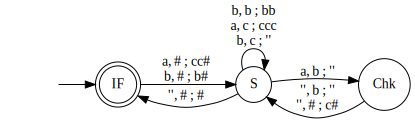

In [6]:
a_2b_pda = md2mc('''
PDA
IF : a,#; cc# -> S
IF : b,#; b#  -> S

S  : b,c; ''  -> S
S  : b,b; bb  -> S

S  : a,c; ccc -> S
S  : a,b; ''  -> Chk

Chk: '',b;''  -> S
Chk: '',#; c# -> S

S  : '',#; #  -> IF
''')
dotObj_pda(a_2b_pda, FuseEdges=True)